# 1. import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Capstone/coding

Mounted at /content/drive


In [ ]:
#imoprt data
import pandas as pd
import numpy as np

path='final_result_df_719.csv'
data_success = pd.read_csv(path)
data_success

,FounderID,CompanyID,CareerID,Number of professional experience,Number of companies that worked for,Total Work Years,Industry Experience,Management experience,Entrepreneurial Experience,Technical experience,Location,Vertical,Speed_avg,relevance,Founded Company Value,binary success,Level of success
0,1,19921,216950,2,1,7.0,0.0,7.0,0.0,2.5,other,"Carsharing,Micro-mobility,Mobility tech,Ridesh...",0.511111,0,22450000.0,Not successful,Promising
1,3,17160,79402,8,8,31.1,0.0,19.6,9.9,0.0,other,Cryptocurrency and blockchain,0.170841,0,11852455.0,Not successful,Promising
2,6,19921,39,7,6,18.9,0.0,10.3,0.0,6.7,other,"Carsharing,Micro-mobility,Mobility tech,Ridesh...",0.123585,0,22450000.0,Not successful,Promising
3,13,20739,107,3,3,7.1,0.0,0.0,0.0,4.1,london,Foodtech,0.243902,0,350410.0,Not successful,Not successful
4,28,50729,223,7,7,7.2,0.0,5.5,0.0,0.0,other,Cryptocurrency and blockchain,1.073593,0,30000000.0,Not successful,Promising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,25176,161268,333056,8,6,20.7,11.6,2.8,12.7,0.0,other,Artificial intelligence and machine learning (...,0.644841,0,875000.0,Not successful,Not successful
1797,25262,121205,222394,1,1,6.5,0.0,6.5,0.0,0.0,other,Restaurant tech,0.000000,0,750000.0,Not successful,Not successful
1798,25262,121204,258565,2,2,8.8,0.0,8.8,2.3,0.0,san francisco,"Augmented reality (AR),Virtual reality (VR)",0.000000,0,404682445.0,Not successful,Successful
1799,25746,127266,238807,4,4,14.6,0.0,2.6,9.4,2.6,toronto,HRtech,0.480769,0,12500000.0,Not successful,Promising


In [ ]:
data_success.columns

Index(['FounderID', 'CompanyID', 'CareerID',
       'Number of professional experience',
       'Number of companies that worked for', 'Total Work Years',
       'Industry Experience', 'Management experience',
       'Entrepreneurial Experience', 'Technical experience', 'Location',
       'Vertical', 'Speed_avg', 'relevance', 'Founded Company Value',
       'binary success', 'Level of success'],
      dtype='object')

# 2.XGBoost

## 1. multi

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['Level of success']

In [ ]:
data_success['Level of success'].value_counts()

,count
Level of success,
Not successful,791
Promising,539
Successful,260
Moderately Successful,159
Highly successful,52


In [ ]:
pip install xgboost scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
#import some packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
import xgboost as xgb

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


<ipython-input-9-3053382d2c79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-9-3053382d2c79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-9-3053382d2c79>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Feature importance:
relevance: 0.15454110503196716
Entrepreneurial Experience: 0.09037761390209198
Speed_avg: 0.08769883960485458
Management experience: 0.08672095835208893
Total Work Years: 0.08636437356472015
Technical experience: 0.0851997584104538
Number of professional experience: 0.08422285318374634
Location: 0.08291679620742798
Industry Experience: 0.0821259617805481
Vertical: 0.08124656230211258
Number of companies that worked for: 0.07858512550592422


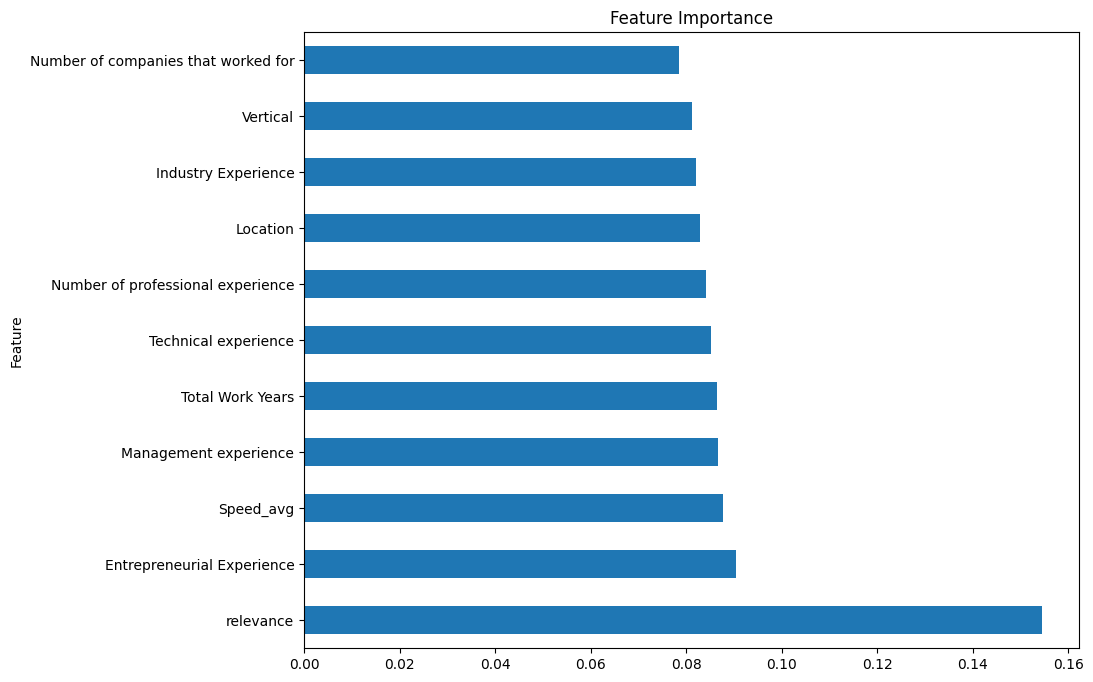

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        28
           2       0.49      0.46      0.47       172
           3       0.31      0.37      0.34       108
           4       0.10      0.12      0.11        43

    accuracy                           0.34       361
   macro avg       0.18      0.19      0.18       361
weighted avg       0.34      0.34      0.34       361

Confusion Matrix:
[[ 0  0  4  2  4]
 [ 0  0 15  8  5]
 [ 3  9 79 58 23]
 [ 2  6 49 40 11]
 [ 0  1 15 22  5]]
Recall Score (macro average):
0.18919035314384153


In [ ]:
# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])
# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))
my_tags = [str(value) for value in my_tags]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# calculate class_weights
class_weights = np.bincount(y_train)
class_weights = {i : class_weights.max() / class_weights[i] for i in range(len(class_weights))}

# Set parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Use GridSearchCV to adjust grid parameters
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), eval_metric='mlogloss', use_label_encoder=False)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train, sample_weight=np.vectorize(class_weights.get)(y_train))

print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, sample_weight=np.vectorize(class_weights.get)(y_train))

# predict
y_pred = best_model.predict(X_test)

# feature importance
importance = best_model.feature_importances_
importance = sorted(zip(X.columns, importance), key=lambda x: x[1], reverse=True)
print("Feature importance:")
for k, v in importance:
    print(f"{k}: {v}")

importance_df = pd.DataFrame(importance, columns=['Feature', 'Importance'])
importance_df.set_index('Feature').plot(kind='barh', figsize=(10, 8), legend=False)
plt.title('Feature Importance')
plt.show()

# Classification reports and metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Multi-category Recall scores
recall = recall_score(y_test, y_pred, average='macro')
print("Recall Score (macro average):")
print(recall)


## 2.binary

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_curve, auc

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['binary success']# 'binary success'

In [ ]:
y.value_counts()

,count
binary success,
Not successful,1749
successful,52


Fitting 3 folds for each of 1944 candidates, totalling 5832 fits


<ipython-input-13-08759ef920ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-13-08759ef920ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-13-08759ef920ac>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Best parameters found:  {'alpha': 0, 'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'scale_pos_weight': 1, 'subsample': 0.8}
Best threshold: 0.06180132180452347
Feature importance:
Speed_avg: 352.0
Entrepreneurial Experience: 250.0
Total Work Years: 248.0
Location: 170.0
Vertical: 165.0
Management experience: 156.0
Number of professional experience: 140.0
Technical experience: 117.0
relevance: 97.0
Number of companies that worked for: 40.0
Industry Experience: 10.0
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       351
           1       0.05      0.80      0.10        10

    accuracy                           0.59       361
   macro avg       0.52      0.69      0.42       361
weighted avg       0.96      0.59      0.72       361

Confusion Matrix:
[[205 146]
 [  2   8]]
Recall Score:
0.8


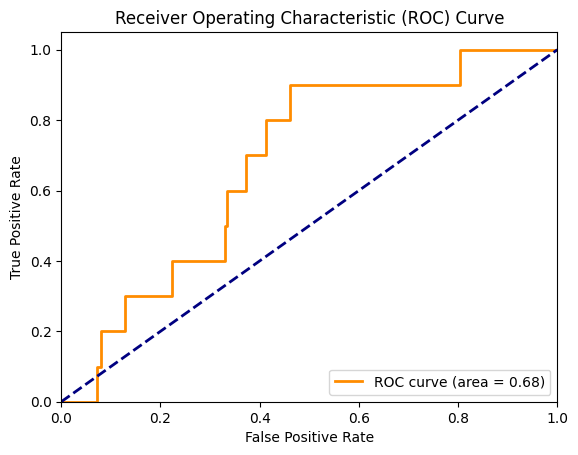

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score
import xgboost as xgb

# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])
# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set model parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Set parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, np.bincount(y_train).max() / np.bincount(y_train)[1]],
    'alpha': [0, 0.1, 0.5, 1]
    #'lambda': [0, 0.1, 0.5]
}

# Use GridSearchCV to adjust grid parameters
model = xgb.XGBClassifier(**params, use_label_encoder=False)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall_weighted', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# prediction
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Choose the best threshold
best_threshold = thresholds[np.argmax([f1_score(y_test, y_pred_prob > t) for t in thresholds])]

# Use optimal threshold for binary classification prediction
y_pred = np.where(y_pred_prob > best_threshold, 1, 0)

print(f"Best threshold: {best_threshold}")

# feature importance
importance = best_model.get_booster().get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("Feature importance:")
for k, v in importance:
    print(f"{k}: {v}")

# Various indicators of prediction results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Recall Score:")
print(recall_score(y_test, y_pred))

# Draw ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 2.lightgbm

## 1.binary

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['binary success']# 'binary success'

In [ ]:
np.bincount(y_train).max() / np.bincount(y_train)[1]

4.7251908396946565

<ipython-input-52-1ba0aa00a823>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-52-1ba0aa00a823>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-52-1ba0aa00a823>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 42, number of negative: 1398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029167 -> initscore=-3.505128
[LightGBM] [Info] Start training from score -3.505128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

<function matplotlib.pyplot.show(close=None, block=None)>

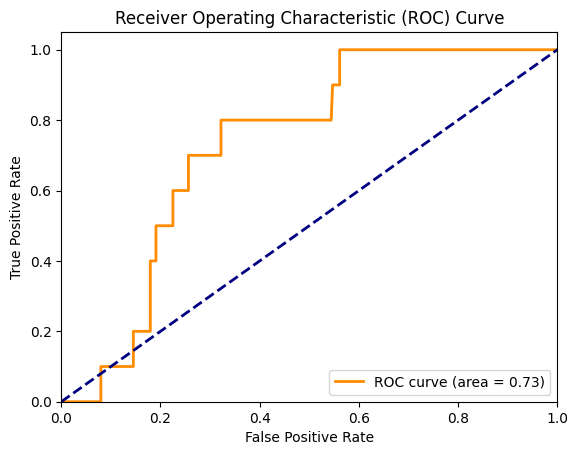

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score
import lightgbm as lgb

# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set model parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss'
}

# Set parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5],
    'num_leaves': [63, 96, 126],  # Adding num_leaves parameter
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, np.bincount(y_train).max() / np.bincount(y_train)[1]]
}

# Use GridSearchCV to adjust grid parameters
model = lgb.LGBMClassifier(**params)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Model prediction
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Choose the best threshold
best_threshold = thresholds[np.argmax([f1_score(y_test, y_pred_prob > t) for t in thresholds])]

# Use optimal threshold for binary classification prediction
y_pred = np.where(y_pred_prob > best_threshold, 1, 0)

# Output optimal threshold
print(f"Best threshold: {best_threshold}")

# Feature importance view
importance = best_model.booster_.feature_importance(importance_type='split')
importance = sorted(zip(best_model.booster_.feature_name(), importance), key=lambda x: x[1], reverse=True)
print("Feature importance:")
for k, v in importance:
    print(f"{k}: {v}")

# Various indicators of prediction results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Recall Score:")
print(recall_score(y_test, y_pred))

# Draw ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show


## 2. multi

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['Level of success']

<ipython-input-10-9d854d49ece9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-10-9d854d49ece9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-10-9d854d49ece9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 11
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

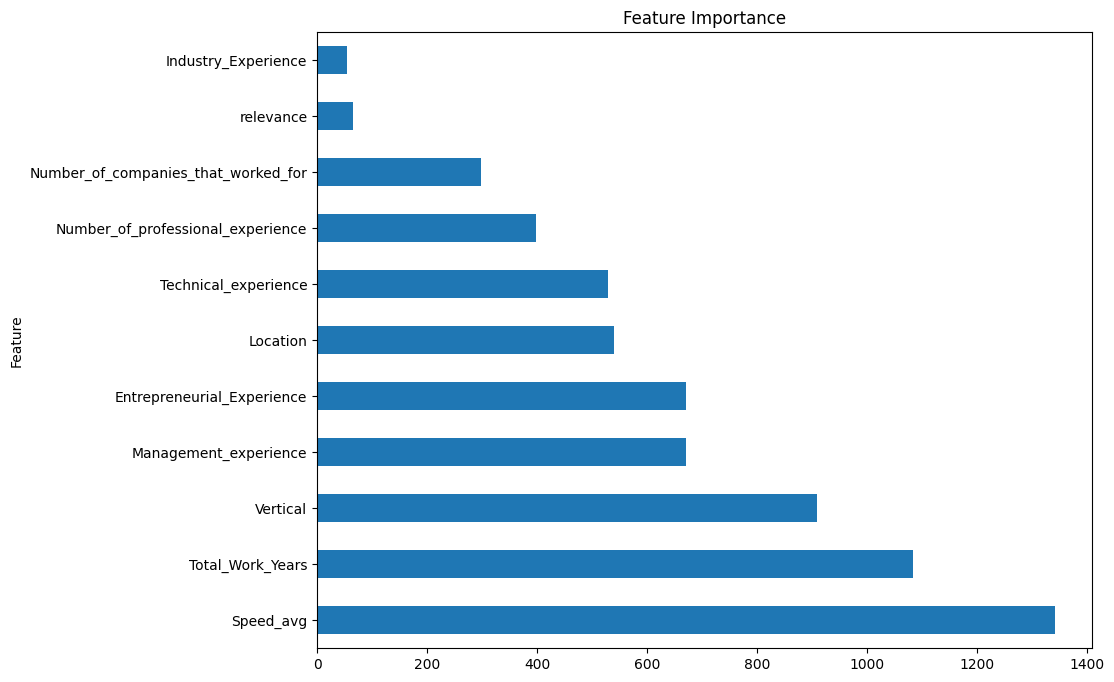

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.03      0.04      0.03        28
           2       0.51      0.43      0.47       172
           3       0.32      0.38      0.35       108
           4       0.15      0.16      0.15        43

    accuracy                           0.34       361
   macro avg       0.20      0.20      0.20       361
weighted avg       0.36      0.34      0.35       361

Confusion Matrix:
[[ 0  1  3  3  3]
 [ 1  1 16  7  3]
 [ 6 17 74 53 22]
 [ 2 10 42 41 13]
 [ 0  1 11 24  7]]
Recall Score (macro average):
0.20167343423157374


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
import lightgbm as lgb

# Assuming 'X' and 'y' are your features and labels respectively
# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))
my_tags = [str(value) for value in my_tags]

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class_weights
class_weights = np.bincount(y_train)
class_weights = {i : class_weights.max() / class_weights[i] for i in range(len(class_weights))}

# Set parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5],
    'num_leaves': [63, 96, 126],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to adjust grid parameters
model = lgb.LGBMClassifier(objective='multiclass', metric='multi_logloss', num_class=len(np.unique(y)))
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train, sample_weight=np.vectorize(class_weights.get)(y_train))

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, sample_weight=np.vectorize(class_weights.get)(y_train))

# Model prediction
y_pred = best_model.predict(X_test)

# Feature importance view
importance = best_model.booster_.feature_importance(importance_type='split')
importance = sorted(zip(best_model.booster_.feature_name(), importance), key=lambda x: x[1], reverse=True)
print("Feature importance:")
for k, v in importance:
    print(f"{k}: {v}")

# Feature importance visualization

importance_df = pd.DataFrame(importance, columns=['Feature', 'Importance'])
importance_df.set_index('Feature').plot(kind='barh', figsize=(10, 8), legend=False)
plt.title('Feature Importance')
plt.show()
# Classification reports and metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Multi-category Recall scores
recall = recall_score(y_test, y_pred, average='macro')
print("Recall Score (macro average):")
print(recall)


# 3.SVM

## 1.binary

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['binary success']# 'binary success'

In [ ]:
X['Speed_avg'].fillna(0, inplace=True)

<ipython-input-38-65f8ab36d01e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Speed_avg'].fillna(0, inplace=True)


<ipython-input-40-1b20891fb3cb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-40-1b20891fb3cb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-40-1b20891fb3cb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

Best parameters found:  {'class_weight': 'balanced', 'kernel': 'linear'}
Best threshold: 0.05014032531912079
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       351
           1       0.07      0.10      0.08        10

    accuracy                           0.94       361
   macro avg       0.52      0.53      0.52       361
weighted avg       0.95      0.94      0.94       361

Confusion Matrix:
[[337  14]
 [  9   1]]
Recall Score:
0.1


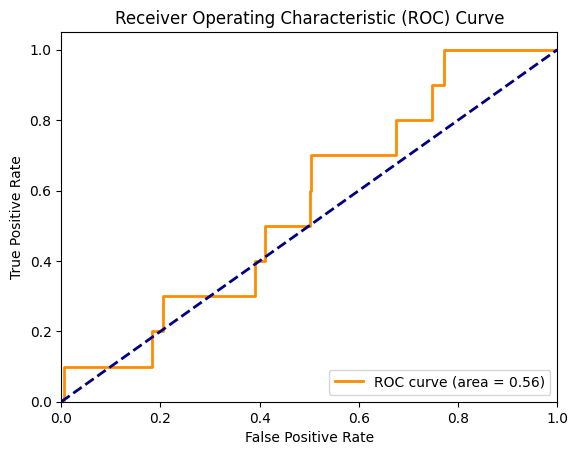

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score

# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set model parameters
params = {
    'probability': True  # Enable probability estimates for ROC curve and thresholding
     # Automatically adjust weights inversely proportional to class frequencies
}

# Set parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': ['None','balanced']
}

# Use GridSearchCV to adjust grid parameters
model = SVC(**params)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Model prediction
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Choose the best threshold
best_threshold = thresholds[np.argmax([f1_score(y_test, y_pred_prob > t) for t in thresholds])]

# Use optimal threshold for binary classification prediction
y_pred = np.where(y_pred_prob > best_threshold, 1, 0)

# Output optimal threshold
print(f"Best threshold: {best_threshold}")

# Various indicators of prediction results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Recall Score:")
print(recall_score(y_test, y_pred))

# Draw ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 2.multi

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['Level of success']
X['Speed_avg'].fillna(0, inplace=True)

<ipython-input-16-c9cfa97d315b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Speed_avg'].fillna(0, inplace=True)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


<ipython-input-17-5bb7041123b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-17-5bb7041123b0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-17-5bb7041123b0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Best parameters found:  {'class_weight': None, 'kernel': 'poly'}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        28
           2       0.48      1.00      0.65       172
           3       0.00      0.00      0.00       108
           4       0.00      0.00      0.00        43

    accuracy                           0.48       361
   macro avg       0.10      0.20      0.13       361
weighted avg       0.23      0.48      0.31       361

Confusion Matrix:
[[  0   0  10   0   0]
 [  0   0  28   0   0]
 [  0   0 172   0   0]
 [  0   0 108   0   0]
 [  0   0  43   0   0]]
Recall Score (macro average):
0.2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


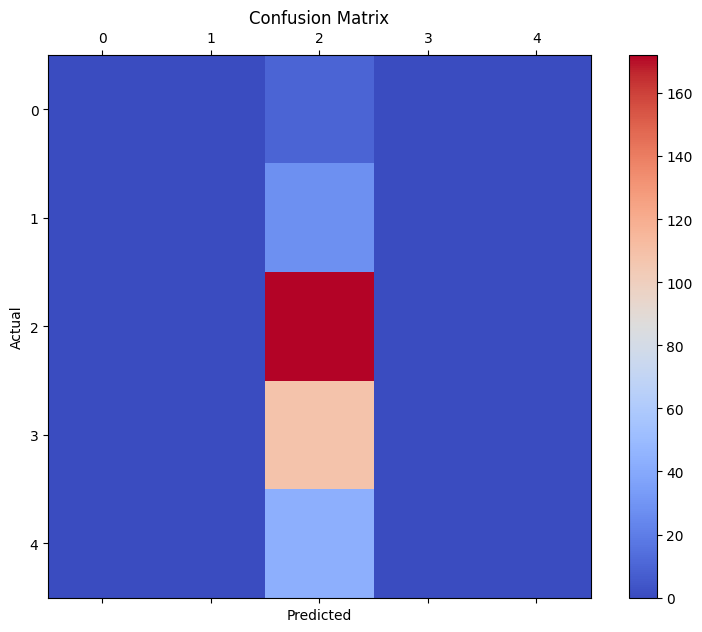

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score

# Encoding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardizing numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# Encoding labels
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up model parameters
params = {
    'probability': True  # Enable probability estimates for multi-class classification
}

# Setting up parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None, 'balanced']
}

# Using GridSearchCV for hyperparameter tuning
model = SVC(**params)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Outputting the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Training the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Model predictions
y_pred = best_model.predict(X_test)

# Classification report and metrics (including recall)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Recall score for multi-class
recall = recall_score(y_test, y_pred, average='macro')
print("Recall Score (macro average):")
print(recall)

# Plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.matshow(conf_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 4.RF

## 1.binary

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['binary success']# 'binary success'

In [ ]:
X['Speed_avg'].fillna(0, inplace=True)

<ipython-input-42-65f8ab36d01e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Speed_avg'].fillna(0, inplace=True)


<ipython-input-43-5cae76968121>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-43-5cae76968121>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-43-5cae76968121>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best threshold: 0.11509234119552891
Feature importance:
                                Feature  Importance
8                              Vertical    0.149368
2                      Total Work Years    0.142716
9                             Speed_avg    0.131992
0     Number of professional experience    0.115524
6                  Technical experience    0.090226
7                              Location    0.089554
1   Number of companies that worked for    0.086212
4                 Management experience    0.078086
5            Entrepreneurial Experience    0.076395
10                            relevance    0.034773
3                   Industry Experience    0.005153
Classification Report:
              precision    recall  f1-score   support

           0      

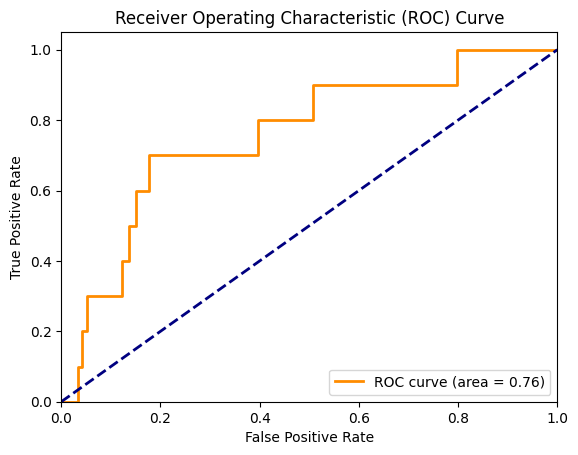

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Encoding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardizing numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# Encoding labels
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the parameter grid for Random Forest, including class_weight
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Using GridSearchCV for hyperparameter tuning
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Outputting the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Training the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Model predictions
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Selecting the best threshold (can maximize F1 score)
best_threshold = thresholds[np.argmax([f1_score(y_test, y_pred_prob > t) for t in thresholds])]

# Using the best threshold for binary classification prediction
y_pred = np.where(y_pred_prob > best_threshold, 1, 0)

# Outputting the best threshold
print(f"Best threshold: {best_threshold}")

# Feature importance
importance = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature importance:")
print(importance_df)

# Classification report and metrics (including recall)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Recall Score:")
print(recall_score(y_test, y_pred))

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 2. multi

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['Level of success']

In [ ]:
X['Speed_avg'].fillna(0, inplace=True)

<ipython-input-10-65f8ab36d01e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Speed_avg'].fillna(0, inplace=True)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


<ipython-input-12-a7284d2100d7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-12-a7284d2100d7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-12-a7284d2100d7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Best parameters found:  {'bootstrap': True, 'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


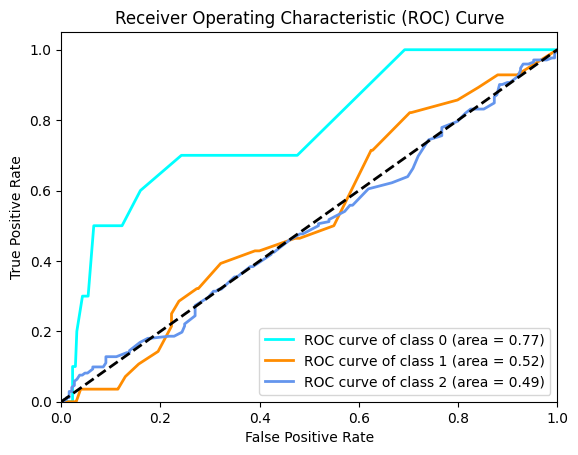

Feature importance:
                                Feature  Importance
8                              Vertical    0.164020
2                      Total Work Years    0.142877
9                             Speed_avg    0.136227
4                 Management experience    0.105259
7                              Location    0.102091
6                  Technical experience    0.085169
5            Entrepreneurial Experience    0.083423
0     Number of professional experience    0.078727
1   Number of companies that worked for    0.077674
3                   Industry Experience    0.013242
10                            relevance    0.011292


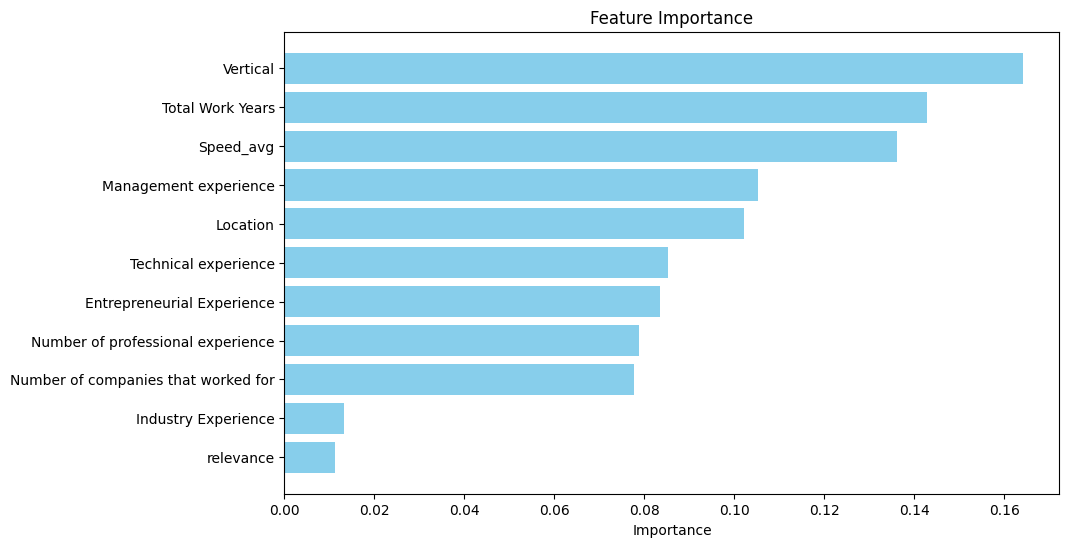

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        28
           2       0.47      0.60      0.53       172
           3       0.30      0.33      0.32       108
           4       0.11      0.05      0.06        43

    accuracy                           0.39       361
   macro avg       0.18      0.20      0.18       361
weighted avg       0.33      0.39      0.35       361

Confusion Matrix:
[[  0   0   7   2   1]
 [  0   0  17   7   4]
 [  2   2 103  56   9]
 [  1   1  67  36   3]
 [  0   0  23  18   2]]
Recall Score (Macro Average):
0.1957364341085271


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Encoding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardizing numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# Encoding labels
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))
my_tags = [str(value) for value in my_tags]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the parameter grid for Random Forest, including class_weight
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Using GridSearchCV for hyperparameter tuning
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Outputting the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Training the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Model predictions
y_pred_prob = best_model.predict_proba(X_test)

# Calculating ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(my_tags)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(len(my_tags)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(my_tags[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Using the best threshold for multi-class classification prediction
y_pred = best_model.predict(X_test)

# Feature importance
importance = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature importance:")
print(importance_df)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Classification report and metrics (including recall)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Recall Score (Macro Average):")
print(recall_score(y_test, y_pred, average='macro'))


# 5. GBDT

## 1.binary

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['binary success']# 'binary success'

In [ ]:
#GBDT is sensitive to NAN
X['Speed_avg'].fillna(0, inplace=True)

<ipython-input-41-9566bb5ec30a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Speed_avg'].fillna(0, inplace=True)


<ipython-input-42-4580a54dc87a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-42-4580a54dc87a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-42-4580a54dc87a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'subsample': 0.6}
Best threshold: 0.010296929708797321
Feature importance:
Vertical: 0.16038140992548947
Total Work Years: 0.1418054694803323
Speed_avg: 0.10922200324821872
Entrepreneurial Experience: 0.10398577821547167
Number of companies that worked for: 0.09479217659217237
Management experience: 0.08986128324970837
Location: 0.08977801049528965
Number of professional experience: 0.08807138631156511
Technical experience: 0.08063094569095282
relevance: 0.02595710459185203
Industry Experience: 0.015514432198947332
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       351
           1       0.11      0.20      0.14        10

    accuracy                           0.93       361
   macro avg       0.54      0.58      

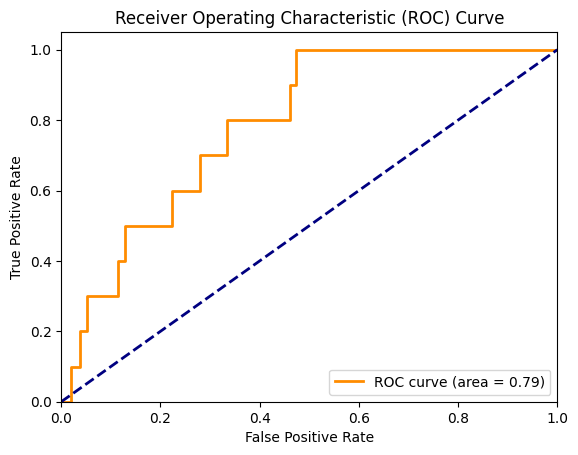

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set sample weights for imbalanced data
class_weights = np.bincount(y_train)
sample_weights = np.where(y_train == 1, class_weights[0] / class_weights[1], 1.0)

# Set parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Use GridSearchCV to adjust grid parameters
model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, sample_weight=sample_weights)

# Model prediction
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Choose the best threshold
best_threshold = thresholds[np.argmax([f1_score(y_test, y_pred_prob > t) for t in thresholds])]

# Use optimal threshold for binary classification prediction
y_pred = np.where(y_pred_prob > best_threshold, 1, 0)

# Output the best threshold
print(f"Best threshold: {best_threshold}")

# Feature importance view
importance = best_model.feature_importances_
importance = sorted(zip(X.columns, importance), key=lambda x: x[1], reverse=True)
print("Feature importance:")
for k, v in importance:
    print(f"{k}: {v}")

# Various indicators of prediction results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Recall Score:")
print(recall_score(y_test, y_pred))

# Draw ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 2.multi

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['Level of success']

In [ ]:
#GBDT is sensitive to NAN
X['Speed_avg'].fillna(0, inplace=True)

<ipython-input-19-9566bb5ec30a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Speed_avg'].fillna(0, inplace=True)


<ipython-input-20-d9d15f0b76d1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-20-d9d15f0b76d1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-20-d9d15f0b76d1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'subsample': 0.6}
Feature importance:
Vertical: 0.2120554081487282
Total Work Years: 0.1405064199399991
Speed_avg: 0.13036927114463093
Location: 0.09064352546094132
Management experience: 0.08944779011168502
Number of professional experience: 0.08482399441665271
Entrepreneurial Experience: 0.08103851489660091
Technical experience: 0.07335869589812538
Number of companies that worked for: 0.06344947913455051
relevance: 0.0193682985129013
Industry Experience: 0.014938602335184488
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        28
           2       0.45      0.49      0.47       172
           3       0.27      0.31      0.29       108
           4       0.13   

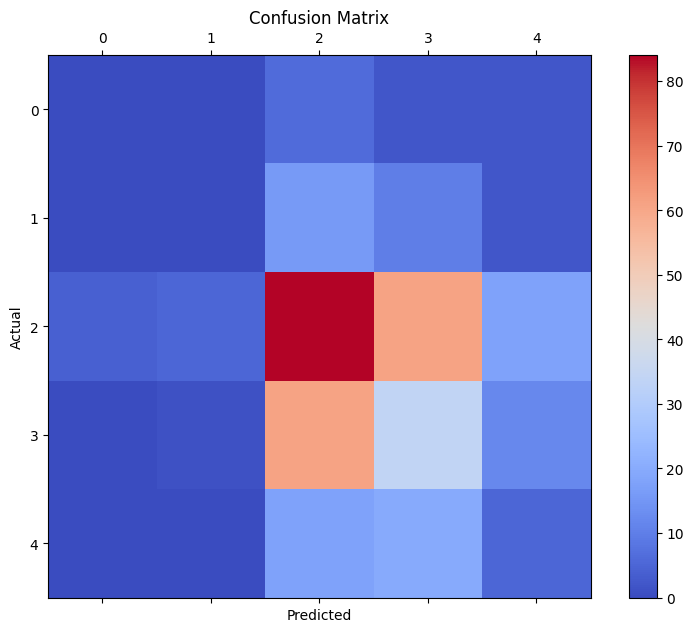

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight

# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set sample weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weight for i, class_weight in enumerate(class_weights)}

# Set parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Use GridSearchCV to adjust grid parameters
model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train, sample_weight=np.vectorize(class_weight_dict.get)(y_train))

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, sample_weight=np.vectorize(class_weight_dict.get)(y_train))

# Model prediction
y_pred = best_model.predict(X_test)

# Feature importance view
importance = best_model.feature_importances_
importance = sorted(zip(X.columns, importance), key=lambda x: x[1], reverse=True)
print("Feature importance:")
for k, v in importance:
    print(f"{k}: {v}")

# Various indicators of prediction results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Recall score for multi-class
recall = recall_score(y_test, y_pred, average='macro')
print("Recall Score (macro average):")
print(recall)

# Draw Confusion Matrix
plt.figure(figsize=(10, 7))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 6.KNN

In [ ]:
X=data_success[['Number of professional experience','Number of companies that worked for', 'Total Work Years','Industry Experience', 'Management experience','Entrepreneurial Experience', 'Technical experience', 'Location','Vertical', 'Speed_avg', 'relevance']]
y=data_success['binary success']# 'binary success'

In [ ]:
#KNN is sensitive to NAN
X['Speed_avg'].fillna(0, inplace=True)

<ipython-input-6-e1ee694715a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Speed_avg'].fillna(0, inplace=True)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


<ipython-input-8-fb595fed5e9b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])
<ipython-input-8-fb595fed5e9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vertical'] = le_vertical.fit_transform(X['Vertical'])
<ipython-input-8-fb595fed5e9b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best threshold: 0.2580219091161011
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       351
           1       0.04      0.40      0.08        10

    accuracy                           0.75       361
   macro avg       0.51      0.58      0.47       361
weighted avg       0.95      0.75      0.83       361

Confusion Matrix:
[[266  85]
 [  6   4]]
Recall Score:
0.4


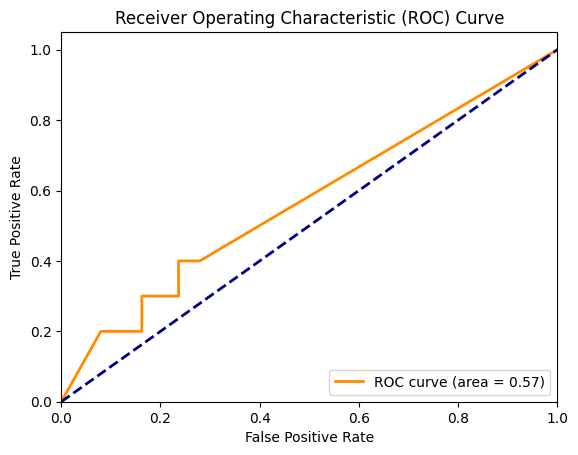

In [ ]:

from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, recall_score, f1_score

# Assuming 'X' and 'y' are your features and labels respectively
# Coding categorical variables
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_vertical = LabelEncoder()
X['Vertical'] = le_vertical.fit_transform(X['Vertical'])

# Standardized numerical features
scaler = StandardScaler()
X[['Number of professional experience', 'Number of companies that worked for', 'Total Work Years',
   'Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience',
   'Speed_avg']] = scaler.fit_transform(X[['Number of professional experience', 'Number of companies that worked for',
                                            'Total Work Years', 'Industry Experience', 'Management experience',
                                            'Entrepreneurial Experience', 'Technical experience', 'Speed_avg']])

# encoding tag
le_y = LabelEncoder()
y = le_y.fit_transform(y)

my_tags = list(np.unique(y))  # Change data_success['binary success'] to y if y is already defined
my_tags = [str(value) for value in my_tags]

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
SMOTE
'''
#
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Set model parameters
params = {
    'n_jobs': -1  # Use all processors for parallel processing
}

# Set parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to adjust grid parameters
model = KNeighborsClassifier(**params)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model using optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Model prediction
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Choose the best threshold
best_threshold = thresholds[np.argmax([f1_score(y_test, y_pred_prob > t) for t in thresholds])]

# Use optimal threshold for binary classification prediction
y_pred = np.where(y_pred_prob > best_threshold, 1, 0)

# Output optimal threshold
print(f"Best threshold: {best_threshold}")

# Various indicators of prediction results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Recall Score:")
print(recall_score(y_test, y_pred))

# Draw ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
